In [1]:
%pip install h5py

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import gc
gc.enable()

Number_images_train = 40   #give a number between 200 and 4000. Works good with 200
 
# Function to load features and labels from a single image
def load_data(image_id):
    image_path = "./data/TrainData/img/image_" + str(image_id) + ".h5"
    mask_path = "./data/TrainData/mask/mask_" + str(image_id) + ".h5"

    Train_X = np.zeros((128, 128, 6))
    Train_Y = np.zeros((128, 128, 1))

    with h5py.File(image_path, 'r') as hdf:
        data_image = np.array(hdf.get('img'))
        data_image[np.isnan(data_image)] = 0.0000001

        data_red = data_image[:, :, 3]  # red band
        data_nir = data_image[:, :, 7]  # near infrared band
        data_ndvi = np.divide((data_nir - data_red), np.add(data_nir, data_red))  # calculating ndvi

       
        Train_X[:,:,0] = data_red             #red band 
        Train_X[:,:,1] = data_image[:,:,2]    #green band
        Train_X[:,:,2] = data_image[:,:,1]    #blue band
        Train_X[:,:,3] = data_ndvi            #ndvi band
        Train_X[:,:,4] = data_image[:,:,12]   #slope band
        Train_X[:,:,5] = data_image[:,:,13]   #elevation band

        hdf.close()

    try:
        with h5py.File(mask_path, 'r') as hdf:
            data_mask = np.array(hdf.get('mask'))
            data_mask[np.isnan(data_mask)] = 0.0000001
            Train_Y[:, :, 0] = data_mask
            hdf.close()
    except Exception as e:
        print("Error loading mask:", str(e))

    return Train_X, Train_Y

# Load data from multiple images
all_X_train = []
all_Y_train = []

# Assuming you have 3799 images
for image_id in range(1, Number_images_train+1):
    print("Appending image:", image_id)
    Train_X, Train_Y = load_data(image_id)
    all_X_train.append(Train_X)
    all_Y_train.append(Train_Y)
    
    


# Concatenate data from all images
X_train = np.concatenate(all_X_train, axis=0)
Y_train = np.concatenate(all_Y_train, axis=0)


del all_X_train
del all_Y_train


X_train_flat = np.reshape(X_train, (X_train.shape[0]*X_train.shape[1], X_train.shape[2]))  #2d array
Y_train_flat = np.reshape(Y_train, (Y_train.shape[0]*Y_train.shape[1], Y_train.shape[2]))  #2d array


del X_train
del Y_train

Appending image: 1
Appending image: 2
Appending image: 3
Appending image: 4
Appending image: 5
Appending image: 6
Appending image: 7
Appending image: 8
Appending image: 9
Appending image: 10
Appending image: 11
Appending image: 12
Appending image: 13
Appending image: 14
Appending image: 15
Appending image: 16
Appending image: 17
Appending image: 18
Appending image: 19
Appending image: 20
Appending image: 21
Appending image: 22
Appending image: 23
Appending image: 24
Appending image: 25
Appending image: 26
Appending image: 27
Appending image: 28
Appending image: 29
Appending image: 30
Appending image: 31
Appending image: 32
Appending image: 33
Appending image: 34
Appending image: 35
Appending image: 36
Appending image: 37
Appending image: 38
Appending image: 39
Appending image: 40


In [2]:
# Splitting data into training and testing
# X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X_train_flat, Y_train_flat, test_size=0.4, random_state=42)


In [3]:
# Scale the inut to the classifier
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_flat)
# X_test_scaled = scaler.transform(X_test_flat)

In [4]:
# import classifier and fit the dataset in it
from sklearn.svm import SVC
svm_model = SVC(kernel='rbf', C=10, gamma='auto', verbose=3)
svm_model.fit(X_train_scaled, Y_train_flat)

C:\Users\anurag\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LibSVM]

In [ ]:
image = 1010   #Test image number. Enter a value between 1 and 3799
image_path = "./data/TrainData/img/image_"+str(image)+".h5"
mask_path = "./data/TrainData/mask/mask_"+str(image)+".h5"


Test_x = np.zeros((128,128,6))
Test_y = np.zeros((128,128,1))

with h5py.File(image_path, 'r') as hdf:
    data_image = np.array(hdf.get('img'))
    data_image[np.isnan(data_image)] = 0.0000001

    data_red = data_image[:,:,3]  #red band
    data_nir = data_image[:,:,7]  #near infrared band
    data_ndvi = np.divide((data_nir - data_red),np.add(data_nir, data_red)) #calculating ndvi

    
    Test_x[:,:,0] = data_red             #red band 
    Test_x[:,:,1] = data_image[:,:,2]    #green band
    Test_x[:,:,2] = data_image[:,:,1]    #blue band
    Test_x[:,:,3] = data_ndvi            #ndvi band
    Test_x[:,:,4] = data_image[:,:,12]   #slope band
    Test_x[:,:,5] = data_image[:,:,13]   #elevation band


try:
    with h5py.File(mask_path, 'r') as hdf:
        data_mask = np.array(hdf.get('mask'))
        data_mask[np.isnan(data_mask)] = 0.0000001
        Test_y[:,:,0] = data_mask
        
        # plt.imshow(Test_y)
        # plt.show()
        
except Exception as e:
        print("Error:", str(e))
x_test = np.reshape(Test_x,(Test_x.shape[0]*Test_x.shape[1], Test_x.shape[2]))
y_test = np.reshape(Test_y,(Test_y.shape[0]*Test_y.shape[1], Test_y.shape[2]))
x_test_scaled = scaler.transform(x_test)




In [ ]:
# Test the model with test data
y_pred = svm_model.predict(x_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9713134765625
Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99     15866
         1.0       0.56      0.41      0.47       518

    accuracy                           0.97     16384
   macro avg       0.77      0.70      0.73     16384
weighted avg       0.97      0.97      0.97     16384



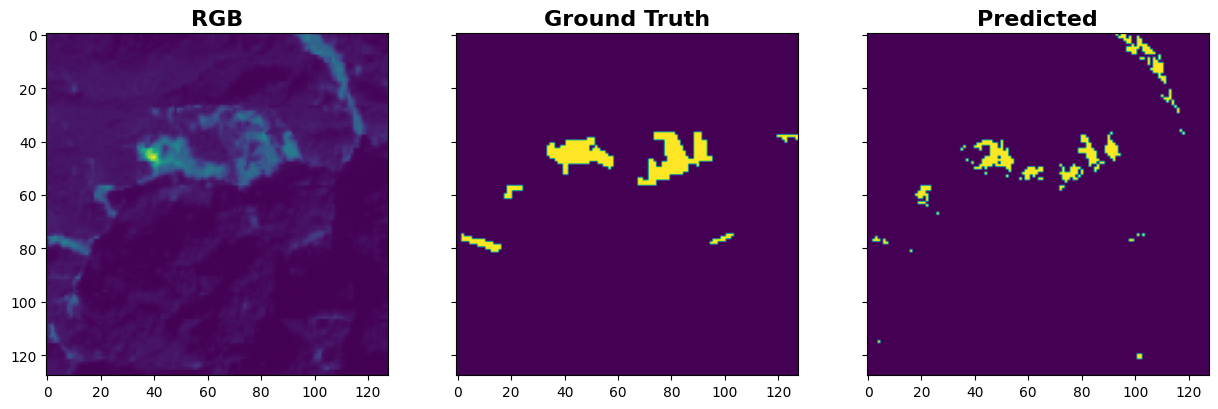

In [ ]:
image_predicted = np.reshape(y_pred, (128,128)) 

# plt.imshow(image_predicted)
# plt.show()
fig, axes = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True, figsize=(15,7))
ax1,ax2,ax3 = axes.flatten()
ax1.set_title("RGB", fontweight='bold', fontsize='16')
ax1.imshow(Test_x[:,:,0])
ax2.set_title("Ground Truth", fontweight='bold', fontsize='16')
ax2.imshow(Test_y[:,:])
ax3.set_title("Predicted", fontweight='bold', fontsize='16')
ax3.imshow(image_predicted[:,:])
plt.show()

In [ ]:
# Saving the model
import joblib
joblib.dump(svm_model, 'image40model.pkl')

['image40model.pkl']

In [ ]:
# Generate report and visualize the prediction